In [1]:
import numpy as np
import pandas as pd


In [2]:
df=pd.read_csv('/kaggle/input/breast-cancer-wisconsin-data/data.csv')

In [3]:
df.shape

(569, 33)

In [22]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [23]:
X=df.drop(['id','Unnamed: 32','diagnosis'],axis=1)
y=df['diagnosis']

In [24]:
print(X)
print(y)

     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     compactness_mean  concavity_mean  concave points_mean  sym

In [13]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [14]:
from sklearn.linear_model import LogisticRegression

In [37]:
logistic_reg = LogisticRegression()

In [20]:
param_grid={
    'penalty' : ['l1','l2','none','elasticent'],
     'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga','lgfgs','sag','newton-cg'],
    'max_iter' : [100,1000,2500,5000]
}


In [21]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['diagnosis']=le.fit_transform(df['diagnosis'])

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2 ,random_state=42)


In [26]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
mms.fit_transform(x_train)
mms.transform(x_test)

array([[0.23404672, 0.30064254, 0.23595106, ..., 0.34879725, 0.2856298 ,
        0.27517803],
       [0.55090847, 0.39228948, 0.53834116, ..., 0.61477663, 0.19436231,
        0.09198033],
       [0.38047897, 0.33040243, 0.38255797, ..., 0.52027491, 0.25073921,
        0.21320787],
       ...,
       [0.18752143, 0.17653027, 0.1845924 , ..., 0.33017182, 0.2166371 ,
        0.19540522],
       [0.31975121, 0.61345959, 0.31747048, ..., 0.28243986, 0.06406466,
        0.19430315],
       [0.63857192, 0.72404464, 0.62441315, ..., 0.57010309, 0.25684999,
        0.23007799]])

In [27]:
from sklearn.model_selection import GridSearchCV

In [28]:
clf = GridSearchCV(logistic_reg,param_grid=param_grid ,cv=3,verbose=True ,n_jobs=1)

In [29]:
clf.fit(X,y)

Fitting 3 folds for each of 480 candidates, totalling 1440 fits


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 1000, 2500, 5000],
                         'penalty': ['l1', 'l2', 'none', 'elasticent'],
                         'solver': ['liblinear', 'saga', 'lgfgs', 'sag',
                                    'newton-cg']},
             verbose=True)

In [36]:
best_clf=clf.best_estimator_

LogisticRegression(C=0.001, penalty='none', solver='newton-cg')

In [35]:
print (f'Accuracy - : {best_clf.score(X,y):.3f}')

Accuracy - : 0.984


In [38]:
logistic_reg = LogisticRegression(C=0.001, penalty='none', solver='newton-cg')

In [39]:
logistic_reg.fit(x_train,y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


LogisticRegression(C=0.001, penalty='none', solver='newton-cg')

In [41]:
perd=logistic_reg.predict(x_test)

In [42]:
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,classification_report

In [47]:
print(accuracy_score(y_test,perd))
print(f1_score(y_test,perd))
print(confusion_matrix(y_test,perd))
print(classification_report(y_test,perd))

0.9824561403508771
0.9767441860465116
[[70  1]
 [ 1 42]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        71
           1       0.98      0.98      0.98        43

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



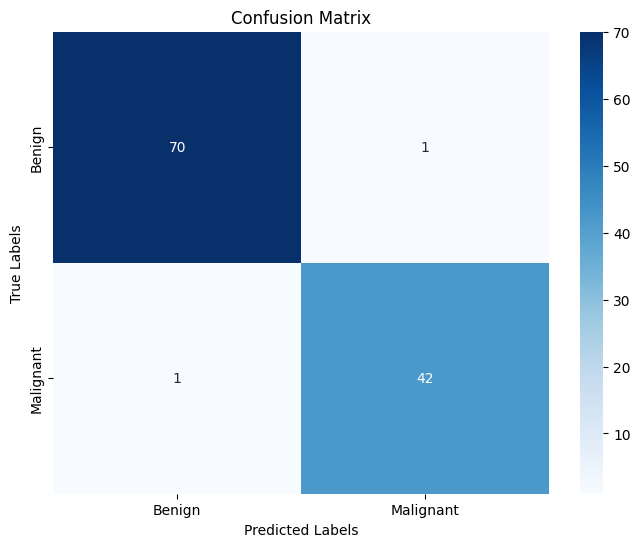

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
cm=confusion_matrix(y_test,perd)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=["Benign", "Malignant"],
            yticklabels=["Benign", "Malignant"])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()